# AIWIR Assignment 2 :

### Sahil G Rao      [PES2UG20CS295]
### Jyothiraditya S        [PES2UG20CS514]
### R Karthick Manikandan     [PES2UG20CS516]
### N R Ramith   [PES2UG20CS523]

## Content based Recommendation : 

### a) Based on genre

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset :

### https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset

In [ ]:
movie_ids_titles_genre= pd.read_csv("movie.csv")

movie_ids_titles_genre.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_ids_rating= pd.read_csv("rating.csv").iloc[:40000]

movie_ids_rating.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
movie_ids_rating.drop(["timestamp"], inplace=True, axis=1)

movie_ids_rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [ ]:
# merged file containing necessary columns in movie.csv and rating.csv

merged_movie_df= pd.merge(movie_ids_titles_genre, movie_ids_rating, on="movieId")

merged_movie_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [ ]:
# Extracting genre from merged csv and grouping them into categories

genre_labels = set()
for s in movie_ids_titles_genre['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movie_ids_titles_genre, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520]]

In [ ]:
%matplotlib inline
#import wordcloud
from wordcloud import WordCloud, STOPWORDS

### Visualizating data regarding genre

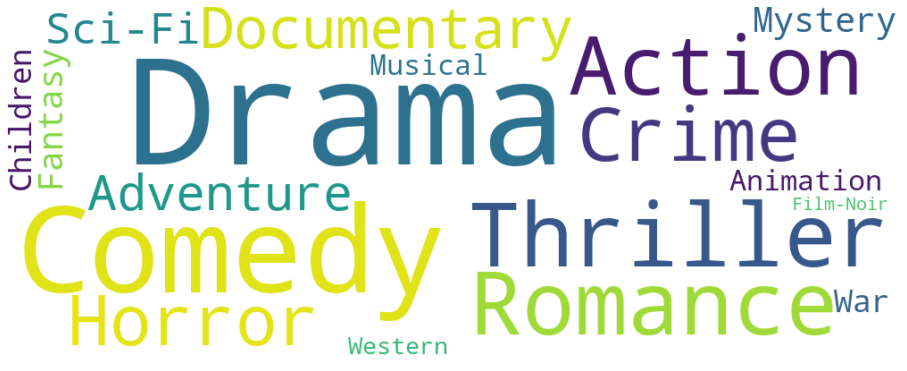

In [ ]:
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

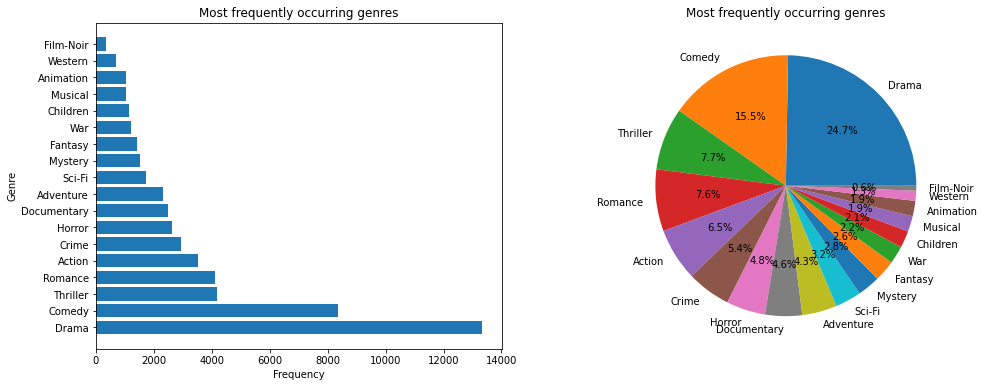

In [ ]:
import matplotlib.pyplot as plt

genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Create a horizontal bar chart on the first subplot
ax1.barh(range(len(genres)), list(genres.values()), align='center')
ax1.set_yticks(range(len(genres)))
ax1.set_yticklabels(list(genres.keys()))
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Genre')
ax1.set_title('Most frequently occurring genres')

# Create a pie chart on the second subplot
ax2.pie(list(genres.values()), labels=list(genres.keys()), autopct='%1.1f%%')
ax2.set_title('Most frequently occurring genres')

# Display the figure
plt.show()


In [ ]:
# Break up the big genre string into a string array
movie_ids_titles_genre['genres'] = movie_ids_titles_genre['genres'].str.split('|')
# Convert genres to string value
movie_ids_titles_genre['genres'] = movie_ids_titles_genre['genres'].fillna("").astype('str')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie_ids_titles_genre['genres'])
tfidf_matrix.shape

(27278, 189)

In [ ]:
# finding similarity between genres user has watched and other genres

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.3170459 , 0.06282188, 0.05665841],
       [0.3170459 , 1.        , 0.        , 0.        ],
       [0.06282188, 0.        , 1.        , 0.35995626],
       [0.05665841, 0.        , 0.35995626, 1.        ]])

In [ ]:
# Build a 1-dimensional array with movie titles
titles = movie_ids_titles_genre['title']
indices = pd.Series(movie_ids_titles_genre.index, index=movie_ids_titles_genre['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:20]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
size = genre_recommendations('Toy Story (1995)')
size

2209                                           Antz (1998)
3027                                    Toy Story 2 (1999)
3663        Adventures of Rocky and Bullwinkle, The (2000)
3922                      Emperor's New Groove, The (2000)
4790                                 Monsters, Inc. (2001)
10114    DuckTales: The Movie - Treasure of the Lost La...
10987                                     Wild, The (2006)
11871                               Shrek the Third (2007)
13337                       Tale of Despereaux, The (2008)
18274    Asterix and the Vikings (Astérix et les Viking...
21355                                         Turbo (2013)
24092                                       Aladdin (1992)
24156                                Boxtrolls, The (2014)
24458            Toy Story Toons: Hawaiian Vacation (2011)
24460                    Toy Story Toons: Small Fry (2011)
24849                             The Magic Crystal (2011)
27270                                Brother Bear 2 (200

#### Evaluation metrics :

In [ ]:
# recommended movies by genre recommendation system
recommended_movies = ["Antz (1998)", "Toy Story 2 (1999)", "Adventures of Rocky and Bullwinkle, The (2000)", "Emperor's New Groove, The (2000)", "Monsters, Inc. (2001)", "DuckTales: The Movie - Treasure of the Lost Lamp (1990)", "Wild, The (2006)", "Shrek the Third (2007)", "Tale of Despereaux, The (2008)", "Asterix and the Vikings (Astérix et les Vikings) (2006)", "Turbo (2013)", "Aladdin (1992)", "Boxtrolls, The (2014)", "Toy Story Toons: Hawaiian Vacation (2011)", "Toy Story Toons: Small Fry (2011)", "The Magic Crystal (2011)", "Brother Bear 2 (2006)", "Twelve Tasks of Asterix, The (Les douze travaux d'Astérix) (1976)", "Atlantis: Milo's Return (2003)"]

# relevant movies given by user 
relevant_movies = ["Toy Story 2 (1999)", "Emperor's New Groove, The (2000)", "Monsters, Inc. (2001)", "Wild, The (2006)", "Shrek the Third (2007)", "Tale of Despereaux, The (2008)", "Aladdin (1992)", "Boxtrolls, The (2014)", "Toy Story Toons: Hawaiian Vacation (2011)"]

# To calculate precision@10 and recall
k = 8

# Recommended item was relevant to the user
TP = len(set(recommended_movies[:k]) & set(relevant_movies))

# Recommended item was not relevant to the user
FP = len(set(recommended_movies[:k]) - set(relevant_movies))

# Relevant item was not recommended to the user
FN = len(set(relevant_movies) - set(recommended_movies[:k]))

precision = TP / (TP + FP)

recall = TP / (TP + FN)

# print precision and recall
print("Precision = ",round(precision, 2))
print("Recall = ",round(recall, 2))


Precision =  0.62
Recall =  0.56


## Collaborative based recommendation : 

In [ ]:
merged_movie_df.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5


In [ ]:
# the movies in descending order of their rating counts

merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Norma Rae (1979)                     5.0
Dolls (2002)                         5.0
In a Better World (Hævnen) (2010)    5.0
Dream Team, The (1989)               5.0
Postcards From the Edge (1990)       5.0
Name: rating, dtype: float64

In [ ]:
# A movie which is rated by large number of people is usually a good movie

# Creating a dataframe that shows the title, mean rating and the rating counts

movie_rating_mean_count= pd.DataFrame(columns=['rating_mean','rating_count'])

movie_rating_mean_count['rating_mean']=merged_movie_df.groupby('title')['rating'].mean()

movie_rating_mean_count['rating_count']=merged_movie_df.groupby('title')['rating'].count()

movie_rating_mean_count.head()

,rating_mean,rating_count
title,,
'Til There Was You (1997),3.000000,1
"'burbs, The (1989)",3.250000,6
'night Mother (1986),5.000000,1
(500) Days of Summer (2009),4.142857,7
*batteries not included (1987),4.000000,3


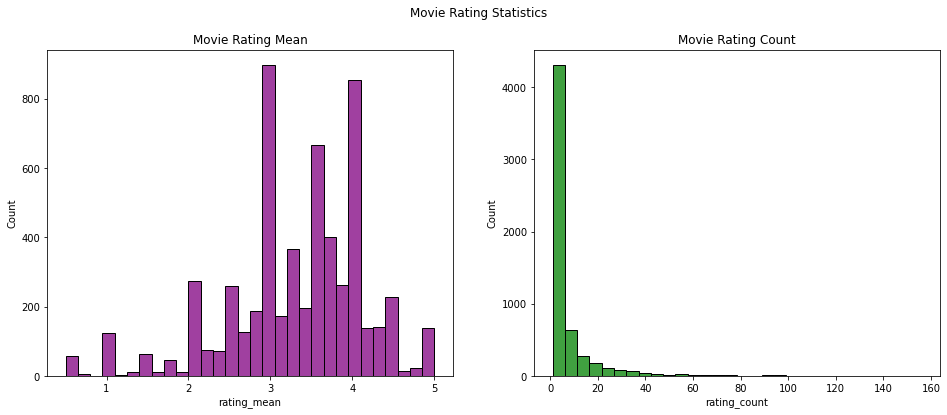

In [ ]:
# Visualizing rating data and rating count 

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# Plot the first histogram on the left subplot
sns.histplot(movie_rating_mean_count["rating_mean"], ax=ax1, color="purple", bins=30)
ax1.set_title("Movie Rating Mean")

# Plot the second histogram on the right subplot
sns.histplot(movie_rating_mean_count["rating_count"], ax=ax2, color="green", bins=30)
ax2.set_title("Movie Rating Count")

# Set the overall title of the figure
fig.suptitle("Movie Rating Statistics")

# Display the figure
plt.show()


<AxesSubplot:xlabel='rating_mean', ylabel='rating_count'>

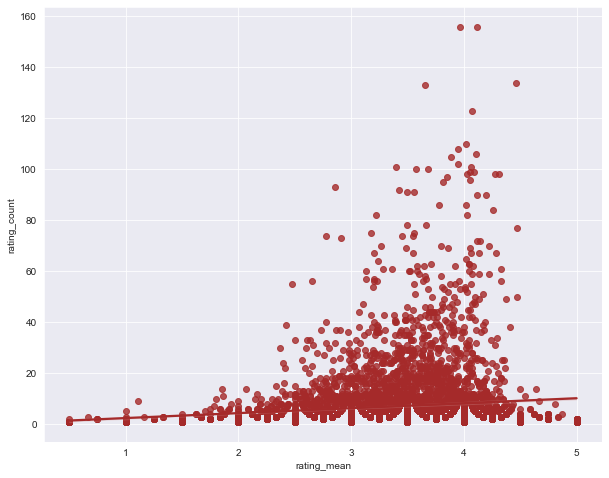

In [ ]:
# We will try to see the relationship between mean rating and rating counts of a movie

plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x="rating_mean", y="rating_count", data=movie_rating_mean_count, color="brown")

In [ ]:
movie_rating_mean_count.sort_values("rating_count", ascending=False).head()

,rating_mean,rating_count
title,,
Pulp Fiction (1994),4.118590,156
Forrest Gump (1994),3.964744,156
"Shawshank Redemption, The (1994)",4.458955,134
Jurassic Park (1993),3.654135,133
"Silence of the Lambs, The (1991)",4.069106,123


### ITEM BASED COLLABORATIVE FILTERING

#### In our dataset we have average ratings for differnet movies given by different users. We will use the
#### average ratings as the common characteristic of collaborative filtering of movies


In [ ]:
# The first step is to create a dataframe where each movie is represented by a column and rows contain user ratings
# for moview

user_movie_rating_matrix= merged_movie_df.pivot_table(index="userId", columns="title", values='rating')

user_movie_rating_matrix

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
304,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_rating_matrix.shape

(306, 5814)

In [ ]:
# Now, we will find movie recommendation based on a single movie and then based on multiple movies

# Finding a recommendation based on a single movie- Suppose we want to find recommendation based on the movie
# Jumanji, First, we will filter the column that conatins the user ratings for the movie

mov_ratings= user_movie_rating_matrix["Toy Story (1995)"]
mov_ratings

userId
1      NaN
2      NaN
3      4.0
4      NaN
5      NaN
      ... 
302    NaN
303    4.0
304    NaN
305    5.0
306    4.0
Name: Toy Story (1995), Length: 306, dtype: float64

In [ ]:
# Next we will find the correlation between the user ratings of all the movies and the user ratings for
# the movie jumanji

mov_correlation=pd.DataFrame(user_movie_rating_matrix.corrwith(mov_ratings), columns=["pf_corr"])

In [ ]:
mov_correlation.sort_values("pf_corr", ascending=False).head(10)

,pf_corr
title,
Suburban Commando (1991),1.0
Dinosaur (2000),1.0
Miss Potter (2006),1.0
Alexander (2004),1.0
Josie and the Pussycats (2001),1.0
Jonah: A VeggieTales Movie (2002),1.0
Double Take (2001),1.0
Stakeout (1987),1.0
Johnny English (2003),1.0


In [ ]:
mov_correlation=mov_correlation.join(movie_rating_mean_count["rating_count"])

mov_correlation.head()

,pf_corr,rating_count
title,,
'Til There Was You (1997),NaN,1
"'burbs, The (1989)",0.192450,6
'night Mother (1986),NaN,1
(500) Days of Summer (2009),-0.878310,7
*batteries not included (1987),0.866025,3


In [ ]:
# A better way is to find the movies with rating counts of atleast 50 and having the highest correlation
# with pulp fiction movie

mov_correlation_50= mov_correlation[mov_correlation['rating_count']>50]

mov_correlation_50.sort_values('pf_corr', ascending=False).head()

,pf_corr,rating_count
title,,
Toy Story (1995),1.000000,105
Trainspotting (1996),0.598425,55
Shrek (2001),0.591509,69
"Lion King, The (1994)",0.541984,86
"Godfather, The (1972)",0.477318,77


In [ ]:
# Finding recommendations based on multiple movies- In this we will see how to recomment movies to a user
# based on his ratings of multiple movies. The first step is to create a dataframe, which contains a correlation
# between all the movies in our dataset in the form of a matrix.

all_movie_correlations= user_movie_rating_matrix.corr(method='pearson', min_periods=50)

all_movie_correlations.head()

title,'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",100 Girls (2000),101 Dalmatians (1996),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),"Zorro, the Gay Blade (1981)",Zulu (1964),"\\""Great Performances\""\"" Cats (1998)""",eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(500) Days of Summer (2009),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
*batteries not included (1987),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now suppose a new user logs into your website. The user has already watched three movies and has given
# rating to those movies

movie_data=[["Jurassic Park (1993)",4.0],['Assassins (1995)',3],['American President, The (1995)',5]]

test_movies=pd.DataFrame(movie_data, columns=['Movie_Name','Movie_Rating'])

test_movies.head()

,Movie_Name,Movie_Rating
0,Jurassic Park (1993),4.0
1,Assassins (1995),3.0
2,"American President, The (1995)",5.0


In [ ]:
all_movie_correlations['Toy Story (1995)'].dropna().head(7)

title
Back to the Future (1985)               0.353541
Braveheart (1995)                       0.134697
Forrest Gump (1994)                     0.358921
Independence Day (a.k.a. ID4) (1996)    0.205037
Jurassic Park (1993)                    0.309445
Pulp Fiction (1994)                     0.094846
Shawshank Redemption, The (1994)        0.252441
Name: Toy Story (1995), dtype: float64

In [ ]:
# Next, we will iterate through the three movies in the test_movie dataframe, find the correlated movies, and then
# multiply the correlation of all the correlated movies with the ratings of the input movie

recommended_movies= pd.Series()

for i in range(0,2):
    movie= all_movie_correlations[test_movies['Movie_Name'][i]].dropna()
    movie= movie.map(lambda movie_corr: movie_corr*test_movies["Movie_Rating"][i])
    recommended_movies= recommended_movies.append(movie)

In [ ]:
recommended_movies

Ace Ventura: Pet Detective (1994)                                                 0.511578
Aladdin (1992)                                                                    0.712796
Apollo 13 (1995)                                                                  1.712496
Back to the Future (1985)                                                         2.340650
Batman (1989)                                                                     0.539815
Batman Forever (1995)                                                             1.281415
Beauty and the Beast (1991)                                                       0.861402
Braveheart (1995)                                                                 1.005760
Dances with Wolves (1990)                                                         0.869749
Die Hard: With a Vengeance (1995)                                                 0.563723
Dumb & Dumber (Dumb and Dumber) (1994)                                            0.830050

In [ ]:
# recommended movies for film "American President, The (1995)"

recommended_movies.sort_values(inplace=True, ascending=False)

print(recommended_movies.head(20))

Jurassic Park (1993)                                     4.000000
Star Wars: Episode VI - Return of the Jedi (1983)        2.374617
Back to the Future (1985)                                2.340650
Mrs. Doubtfire (1993)                                    2.254143
Star Wars: Episode IV - A New Hope (1977)                2.078301
True Lies (1994)                                         1.994208
Star Wars: Episode V - The Empire Strikes Back (1980)    1.968012
Titanic (1997)                                           1.856042
Ghost (1990)                                             1.735504
Sleepless in Seattle (1993)                              1.726953
Apollo 13 (1995)                                         1.712496
Independence Day (a.k.a. ID4) (1996)                     1.644850
Speed (1994)                                             1.533948
Twister (1996)                                           1.485078
Men in Black (a.k.a. MIB) (1997)                         1.439319
Fugitive, 

### Evaluation metrics :

In [ ]:
# recommended movies by genre recommendation system
recommended_movies = ["Jurassic Park (1993)", "Star Wars: Episode VI - Return of the Jedi (1983)", "Back to the Future (1985)", "Mrs. Doubtfire (1993)", "Star Wars: Episode IV - A New Hope (1977)", "True Lies (1994)", "Star Wars: Episode V - The Empire Strikes Back (1980)", "Titanic (1997)", "Ghost (1990)", "Sleepless in Seattle (1993)", "Apollo 13 (1995)", "Independence Day (a.k.a. ID4) (1996)", "Speed (1994)", "Twister (1996)","Men in Black (a.k.a. MIB) (1997)","Fugitive, The (1993)","Batman Forever (1995)","Schindler's List (1993)","Home Alone (1990)","Toy Story (1995)"]

# relevant movies given by user 
relevant_movies = ["Twister (1996)", "Apollo 13 (1995)", "Home Alone (1990)", "Toy Story (1995)", "Back to the Future (1985)", "Jurassic Park (1993)", "Star Wars: Episode IV - A New Hope (1977)", "Star Wars: Episode VI - Return of the Jedi (1983)", "Titanic (1997)"]

# To calculate precision@10 and recall
k = 6

# Recommended item was relevant to the user
TP = len(set(recommended_movies[:k]) & set(relevant_movies))

# Recommended item was not relevant to the user
FP = len(set(recommended_movies[:k]) - set(relevant_movies))

# Relevant item was not recommended to the user
FN = len(set(relevant_movies) - set(recommended_movies[:k]))

precision = TP / (TP + FP)

recall = TP / (TP + FN)

# print precision and recall
print("Precision = ",round(precision, 2))
print("Recall = ",round(recall, 2))


Precision =  0.67
Recall =  0.44


### b) Tag based [Content based recommendation]:

## Method 1 : Using SVD and cosine similarity 

In [ ]:
movie_ids_titles_tag = pd.read_csv("tag.csv")
new_file = movie_ids_titles_tag.iloc[:10000]

new_file.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [ ]:
new_file.drop(["timestamp"], inplace=True, axis=1)

new_file.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [ ]:
new_file.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [ ]:
new_file.drop(["userId"], inplace=True, axis=1)

new_file.head()

,movieId,tag
0,4141,Mark Waters
1,208,dark hero
2,353,dark hero
3,521,noir thriller
4,592,dark hero


In [ ]:
# merged file containing necessary columns in movie.csv and tag.csv

merged_df= pd.merge(movie_ids_titles_genre, new_file, on="movieId")

merged_df.head()


,movieId,title,genres,tag
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",Watched
1,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",computer animation
2,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",Disney animated feature
3,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",Pixar animation
4,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy...",TÃ©a Leoni does not star in this movie


In [ ]:
# set a custom stop list from nltk

from nltk.corpus import stopwords
stop = list(stopwords.words('english'))

# create the tfid vectorizer, alternatively you can also use countVectorizer
tfidf =  TfidfVectorizer(max_features=5000, analyzer = 'word', stop_words=set(stop))
vectorized_data = tfidf.fit_transform(merged_df['tag'])
count_matrix = pd.DataFrame(vectorized_data.toarray(), index=merged_df['tag'].index.tolist())
print(count_matrix)

      0     1     2     3     4     5     6     7     8     9     ...  3701  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
9995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      3702  3703  3704  3705  3706  3707  3708  370

In [ ]:
print(tfidf.get_feature_names_out()[940:990])

['dictatorship' 'didja' 'die' 'diesel' 'dieselpunk' 'dietze' 'difference'
 'different' 'digger' 'diggs' 'dimensional' 'diner' 'dinner' 'dinosaur'
 'dinosaurs' 'direct' 'directed' 'directing' 'direction' 'directly'
 'director' 'directorial' 'dirty' 'disability' 'disambiguation'
 'disambigutation' 'disappointing' 'disaster' 'disc' 'discipline'
 'discover' 'discovers' 'discovery' 'discuss' 'disease' 'disguise'
 'disguised' 'disgusting' 'dislike' 'disney' 'disorder' 'disorientated'
 'disorientatiion' 'disorientating' 'disorientation' 'disorienting'
 'disraeli' 'dissapointing' 'distopia' 'distracted']


In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
# reduce dimensionality for improved performance

svd = TruncatedSVD(n_components=3711)
reduced_data = svd.fit_transform(count_matrix)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# compute the cosine similarity matrix
similarity = cosine_similarity(reduced_data)
similarity

array([[ 1.00000000e+00,  4.65411477e-18, -2.41899738e-16, ...,
        -2.16725462e-24,  1.00000000e+00, -1.61581839e-18],
       [ 4.65411477e-18,  1.00000000e+00, -8.55418573e-18, ...,
         3.13917252e-19,  4.65411477e-18,  1.56277579e-17],
       [-2.41899738e-16, -8.55418573e-18,  1.00000000e+00, ...,
         6.26509556e-19, -2.41899738e-16,  1.88104577e-17],
       ...,
       [-2.16725462e-24,  3.13917252e-19,  6.26509556e-19, ...,
         1.00000000e+00, -2.16725462e-24,  6.19466793e-19],
       [ 1.00000000e+00,  4.65411477e-18, -2.41899738e-16, ...,
        -2.16725462e-24,  1.00000000e+00, -1.61581839e-18],
       [-1.61581839e-18,  1.56277579e-17,  1.88104577e-17, ...,
         6.19466793e-19, -1.61581839e-18,  1.00000000e+00]])

In [ ]:
import matplotlib.pyplot as plt

def show_results(movie_name, recommended_movies):
    plt.figure(figsize=(8, 10))
    ax = plt.barh(recommended_movies['title'], recommended_movies['sim_scores'])
    plt.gca().invert_yaxis()
    plt.xlabel('Similarity Score')
    plt.title(f'Top Recommendations for {movie_name}')
    for i, v in enumerate(recommended_movies['sim_scores']):
        plt.text(v, i, f'{v:.2f}', fontweight='bold', fontsize=10, va='center')
    plt.show()


1 Toy Story (1995)


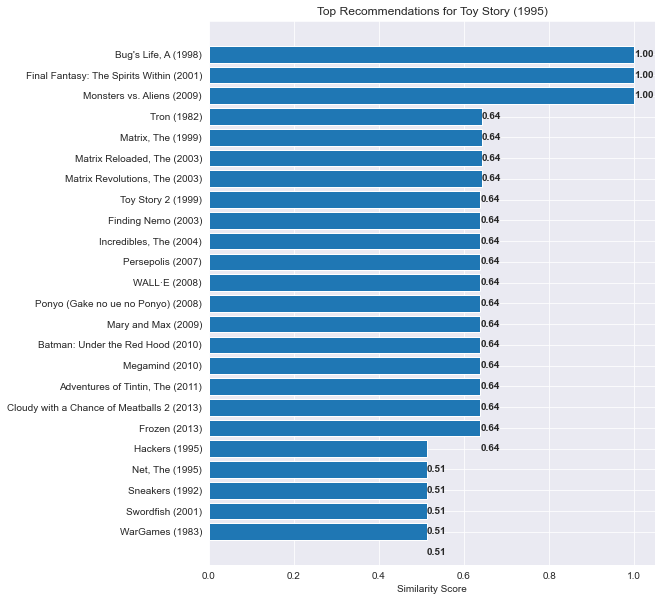

In [ ]:
# create a function that takes in movie title as input and returns a list of the most similar movies
def get_recommendations(title, n, cosine_sim=similarity):
    
    # get the index of the movie that matches the title
    movie_index = merged_df[merged_df.title==title].movieId.values[0]
    print(movie_index, title)
    
    # get the pairwsie similarity scores of all movies with that movie and sort the movies based on the similarity scores
    sim_scores_all = sorted(list(enumerate(cosine_sim[movie_index])), key=lambda x: x[1], reverse=True)
    
    # checks if recommendations are limited
    if n > 0:
        sim_scores_all = sim_scores_all[1:n+1]
        
    # get the movie indices of the top similar movies
    movie_indices = [i[0] for i in sim_scores_all]
    scores = [i[1] for i in sim_scores_all]
    
    # return the top n most similar movies from the movies df
    top_titles_df = pd.DataFrame(merged_df.iloc[movie_indices]['title'])
    top_titles_df['sim_scores'] = scores
    top_titles_df['ranking'] = range(1, len(top_titles_df) + 1)
    
    return top_titles_df, sim_scores_all

# generate a list of recommendations for a specific movie title
movie_name = 'Toy Story (1995)'
number_of_recommendations = 25
top_titles_df, _ = get_recommendations(movie_name, number_of_recommendations)
show_results(movie_name, top_titles_df)



## Method 2 : Using relevance score of tag and jaccard similarity ( Doc2Vec)

In [ ]:
genome_tags= pd.read_csv("genome_tags.csv")

genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
genome_scores= pd.read_csv("genome_scores.csv").iloc[:40000]

genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [ ]:
movie_ids_titles= pd.read_csv("movie.csv")

movie_ids_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
mv_tags_denorm = genome_scores.merge(genome_tags, on = 'tagId').merge(movie_ids_titles, on = 'movieId')
mv_tags_denorm['relevance_rank'] = mv_tags_denorm.groupby("movieId")["relevance"].rank(method = "first", ascending = False).astype('int64')

In [ ]:
merged_df.shape

(10000, 4)

In [ ]:
mv_tags_denorm[mv_tags_denorm.title == 'Toy Story (1995)'][['movieId','title','tag','relevance','relevance_rank']].sort_values(by = 'relevance', ascending = False).head()

,movieId,title,tag,relevance,relevance_rank
1035,1,Toy Story (1995),toys,0.99925,1
243,1,Toy Story (1995),computer animation,0.99850,2
785,1,Toy Story (1995),pixar animation,0.99600,3
588,1,Toy Story (1995),kids and family,0.99075,4
63,1,Toy Story (1995),animation,0.98575,5


In [ ]:
# compute median relevance score for each relevance rank
mv_tags_rank_agg = mv_tags_denorm.groupby('relevance_rank')['relevance'].median().reset_index(name = 'relevance_median').head(100)

# compute percent change of median relevance score as we go down in rank
mv_tags_rank_agg['relevance_median_pct_chg'] = mv_tags_rank_agg['relevance_median'].pct_change()

Text(0.5, 1.0, 'Box Plot: Tag Relevance Score by Rank')

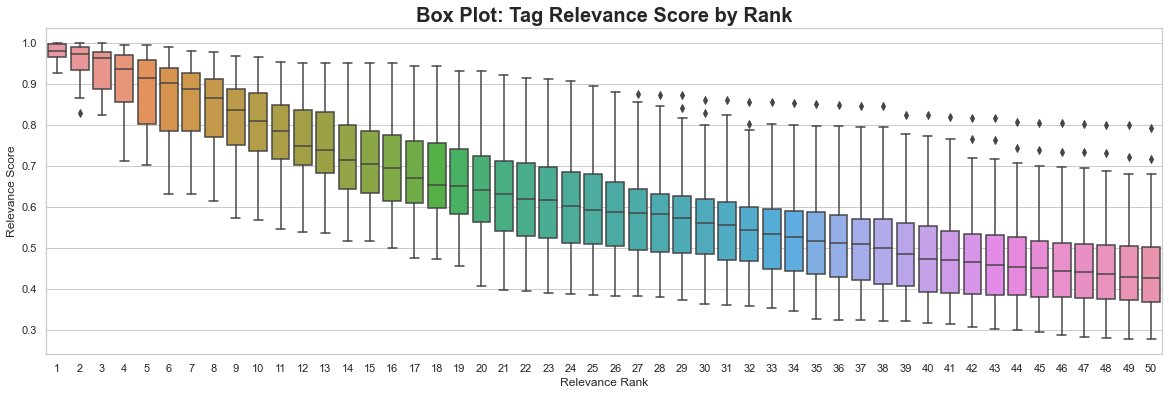

In [ ]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x = "relevance_rank", y = "relevance", data = mv_tags_denorm[mv_tags_denorm.relevance_rank <= 50], showfliers = True)
ax.set(ylabel = "Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("Box Plot: Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

Text(0.5, 1.0, '% Change in Tag Relevance Score by Rank')

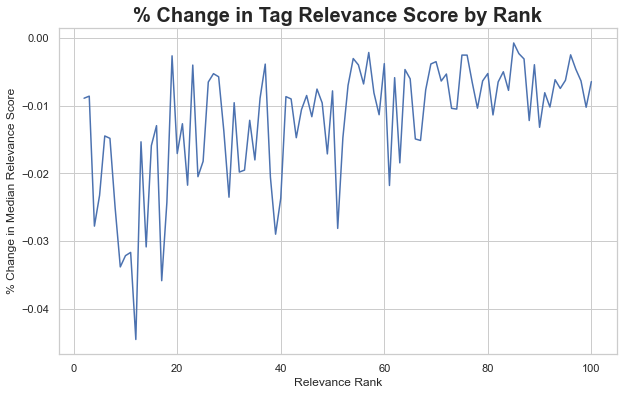

In [ ]:
f, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x="relevance_rank", y="relevance_median_pct_chg", data = mv_tags_rank_agg)
ax.set(ylabel = "% Change in Median Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("% Change in Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

In [ ]:
# flatten tags table to get a list of top 100 tags for each movie
mv_tags_list = mv_tags_denorm[mv_tags_denorm.relevance_rank <= 100].groupby(['movieId','title'])['tag'].apply(lambda x: ','.join(x)).reset_index()
mv_tags_list['tag_list'] = mv_tags_list.tag.map(lambda x: x.split(','))

In [ ]:
mv_tags_list.head(1)

,movieId,title,tag,tag_list
0,1,Toy Story (1995),"3d,action,adventure,affectionate,animal movie,...","[3d, action, adventure, affectionate, animal m..."


In [ ]:
pd.set_option('display.max_colwidth', -1)

mv_tags_list.loc[mv_tags_list.title == 'Toy Story (1995)', ['movieId','title','tag_list']]

,movieId,title,tag_list
0,1,Toy Story (1995),"[3d, action, adventure, affectionate, animal movie, animals, animated, animation, based on book, cartoon, catastrophe, cgi, chase, childhood, children, classic, clever, colourful, comedy, computer animation, cool, creativity, cute, cute!, destiny, dialogue, disney, disney animated feature, entertaining, excellent, excellent script, exciting, fairy tale, family, fantasy, fantasy world, fast paced, feel good movie, feel-good, friendship, fun, fun movie, funny, good, good acting, good soundtrack, good story, good versus evil, goofy, great, great ending, great movie, happy ending, heartwarming, highly quotable, humor, humorous, imagination, imdb top 250, intense, interesting, kids, kids and family, light, mentor, monsters, movielens top pick, nostalgic, original, original plot, oscar, oscar (best animated feature), oscar (best directing), oscar (best effects - visual effects), oscar winner, pg-13, pixar, pixar animation, quotable, redemption, runaway, sentimental, simple, space, story, storytelling, suspense, sweet, talking animals, talky, technology, touching, toys, transformation, unlikely friendships, very funny, very good, visual, whimsical, witty]"


In [ ]:
# compute Jaccard Index to get most similar movies to target movie

pd.reset_option('display.max_colwidth')

target_movie = 'Toy Story (1995)'

target_tag_list = mv_tags_list[mv_tags_list.title == target_movie].tag_list.values[0]
mv_tags_list_sim = mv_tags_list[['movieId','title','tag_list','tag']]
mv_tags_list_sim['jaccard_sim'] = mv_tags_list_sim.tag_list.map(lambda x: len(set(x).intersection(set(target_tag_list))) / len(set(x).union(set(target_tag_list))))
print(f'Movies most similar to {target_movie} based on tags:')
text = ','.join(mv_tags_list_sim.sort_values(by = 'jaccard_sim', ascending = False).head(25)['tag'].values)
mv_tags_list_sim.sort_values(by = 'jaccard_sim', ascending = False).head(10)

Movies most similar to Toy Story (1995) based on tags:


,movieId,title,tag_list,tag,jaccard_sim
0,1,Toy Story (1995),"[3d, action, adventure, affectionate, animal m...","3d,action,adventure,affectionate,animal movie,...",1.000000
33,34,Babe (1995),"[adaptation, adapted from:book, adoption, adve...","adaptation,adapted from:book,adoption,adventur...",0.515152
1,2,Jumanji (1995),"[action, action packed, adaptation, adapted fr...","action,action packed,adaptation,adapted from:b...",0.379310
12,13,Balto (1995),"[adaptation, adapted from:book, adventure, ala...","adaptation,adapted from:book,adventure,alaska,...",0.342282
7,8,Tom and Huck (1995),"[action, action packed, adaptation, adapted fr...","action,action packed,adaptation,adapted from:b...",0.257862
10,11,"American President, The (1995)","[aids, alternate universe, beautiful scenery, ...","aids,alternate universe,beautiful scenery,betr...",0.250000
20,21,Get Shorty (1995),"[adaptation, adapted from:book, anti-hero, bas...","adaptation,adapted from:book,anti-hero,based o...",0.242236
6,7,Sabrina (1995),"[adaptation, based on a play, beautiful, beaut...","adaptation,based on a play,beautiful,beautiful...",0.242236
26,27,Now and Then (1995),"[1970s, adaptation, adapted from:book, adolesc...","1970s,adaptation,adapted from:book,adolescence...",0.242236
4,5,Father of the Bride Part II (1995),"[adaptation, bad plot, bad sequel, beautiful s...","adaptation,bad plot,bad sequel,beautiful scene...",0.234568


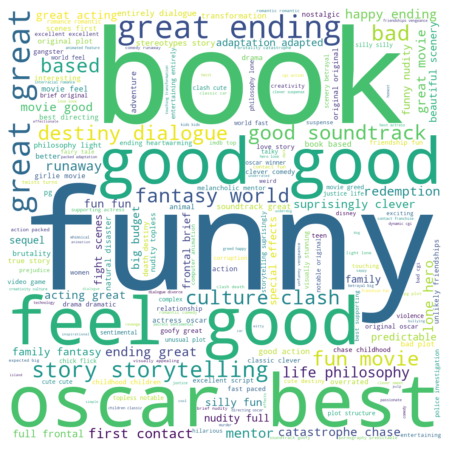

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# Generate a word cloud image
wordcloud = WordCloud(width = 1024, height = 1024, background_color = 'white').generate(text)

# Display the generated image:
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# corpus of movie tags
mv_tags_corpus = mv_tags_list.tag.values

In [ ]:
stop_words = stopwords.words('english')

# tokenize document and clean
def word_tokenize_clean(doc):
  
  # split into lower case word tokens
    tokens = word_tokenize(doc.lower())
  
  # remove tokens that are not alphabetic (including punctuation) and not a stop word
    tokens = [word for word in tokens if word.isalpha() and not word in stop_words]
  
    return tokens

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
# preprocess corpus of movie tags before feeding it into Doc2Vec model
mv_tags_doc = [TaggedDocument(words=word_tokenize_clean(D), tags=[str(i)]) for i, D in enumerate(mv_tags_corpus)]

In [ ]:
# instantiate Doc2Vec model

max_epochs = 50
vec_size = 20
alpha = 0.025

model = Doc2Vec(alpha=alpha, min_alpha=0.00025,min_count=1,dm=0) # paragraph vector distributed bag-of-words (PV-DBOW)
  
model.build_vocab(mv_tags_doc)

In [ ]:
# train Doc2Vec model
# stochastic (random initialization), so each run will be different unless you specify seed

print('Epoch', end = ': ')
for epoch in range(max_epochs):
    print(epoch, end = ' ')
    model.train(mv_tags_doc,
              total_examples=model.corpus_count,
              epochs=model.epochs)
  # decrease the learning rate
    model.alpha -= 0.0002
  # fix the learning rate, no decay
    model.min_alpha = model.alpha

Epoch: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [ ]:
mv_tags_vectors = model.dv.vectors
mv_tags_vectors.shape

(36, 100)

In [ ]:
# history of movies the user watched and liked
user_movies = ['Toy Story (1995)','Jumanji (1995)','Tom and Huck (1995)','Sabrina (1995)']

# compute user vector as an average of movie vectors seen by that user
user_movie_vector = np.zeros(shape = mv_tags_vectors.shape[1])
for mv in user_movies:
    mv_index = mv_tags_list[mv_tags_list["title"] == mv].index.values[0]  
    user_movie_vector += mv_tags_vectors[mv_index]

user_movie_vector /= len(user_movies)  

# print(user_movie_vector)
  
#  find movies similar to user vector to generate movie recommendations

print('Movie Recommendations:')

sims = model.docvecs.most_similar(positive = [user_movie_vector], topn = 30)

for i, j in sims:
    movie_sim = mv_tags_list.loc[int(i), "title"].strip()
    if movie_sim not in user_movies:
        print(movie_sim)

Movie Recommendations:
Babe (1995)
Balto (1995)
Father of the Bride Part II (1995)
Cutthroat Island (1995)
Dangerous Minds (1995)
Waiting to Exhale (1995)
Now and Then (1995)
Sense and Sensibility (1995)
GoldenEye (1995)
Powder (1995)
Grumpier Old Men (1995)
Sudden Death (1995)
Get Shorty (1995)
American President, The (1995)
Money Train (1995)
Ace Ventura: When Nature Calls (1995)
Persuasion (1995)
Wings of Courage (1995)
Copycat (1995)
Dracula: Dead and Loving It (1995)
Four Rooms (1995)
Assassins (1995)
City of Lost Children, The (Cité des enfants perdus, La) (1995)
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
Heat (1995)
Othello (1995)
